<a href="https://colab.research.google.com/github/kento-koyama/bayesian_predictive_micro_ICPMF12/blob/main/Example_1/dose_response_in_RJAGS_examp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="tfo-notebook-buttons" align="left">
<td>
<a target="_blank" href="https://github.com/kento-koyama/bayesian_predictive_micro_ICPMF12/"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td>
</table>

# Setting for RJAGS

In [ ]:
uname <- system("uname -a", intern = TRUE)
cat("System information:", uname, "\n")
# Get the current working directory
cwd <- getwd()
cat("Current working directory:", cwd, "\n")
system("sudo apt-get update")
system("sudo apt-get install jags")
# Check the JAGS location
jags_location <- system("which jags", intern = TRUE)
cat("JAGS Location:", jags_location, "\n")
temp_file <- system("mktemp", intern = TRUE)
# Download the JAGS Wiener module .deb file
jags_url <- "https://launchpad.net/~cidlab/+archive/ubuntu/jwm/+files/jags-wiener-module_1.1-5_amd64.deb"
wget_result <- system2("wget", c("-O", temp_file, jags_url), stdout = TRUE, stderr = TRUE)
wget_result
# Install the JAGS Wiener module .deb file
install_result <- system2("sudo", c("dpkg", "-i", temp_file), stdout = TRUE, stderr = TRUE)
# Remove the JAGS Wiener module .deb file
system(paste("rm -f", temp_file))
uname <- system("jags", intern = TRUE)
cat("System information:", uname, "\n")

System information: Linux 8db493a5b861 5.15.107+ #1 SMP Sat Apr 29 09:15:28 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux 
Current working directory: /content 
JAGS Location: /usr/bin/jags 


[1] "--2023-05-26 11:12:29--  https://launchpad.net/~cidlab/+archive/ubuntu/jwm/+files/jags-wiener-module_1.1-5_amd64.deb"       
 [2] "Resolving launchpad.net (launchpad.net)... 185.125.189.223, 185.125.189.222, 2620:2d:4000:1001::8003, ..."                  
 [3] "Connecting to launchpad.net (launchpad.net)|185.125.189.223|:443... connected."                                             
 [4] "HTTP request sent, awaiting response... 303 See Other"                                                                      
 [5] "Location: https://launchpadlibrarian.net/289923160/jags-wiener-module_1.1-5_amd64.deb [following]"                          
 [6] "--2023-05-26 11:12:29--  https://launchpadlibrarian.net/289923160/jags-wiener-module_1.1-5_amd64.deb"                       
 [7] "Resolving launchpadlibrarian.net (launchpadlibrarian.net)... 185.125.189.228, 185.125.189.229, 2620:2d:4000:1001::8007, ..."
 [8] "Connecting to launchpadlibrarian.net (launchpadlibrarian.net)|185.125.189.228|:443... connected."                           
 [9] "HTTP request sent, awaiting response... 200 OK"                                                                             
[10] "Length: 18376 (18K) [application/x-debian-package]"                                                                         
[11] "Saving to: ‘/tmp/tmp.eV065KHVOC’"                                                                                           
[12] ""                                                                                                                           
[13] "     0K .......... .......                                    100% 50.3M=0s"                                                
[14] ""                                                                                                                           
[15] "2023-05-26 11:12:30 (50.3 MB/s) - ‘/tmp/tmp.eV065KHVOC’ saved [18376/18376]"                                                
[16] ""

System information: Welcome to JAGS 4.3.2 on Fri May 26 11:12:30 2023 JAGS is free software and comes with ABSOLUTELY NO WARRANTY Loading module: basemod: ok Loading module: bugs: ok .  


In [ ]:
#Install and library
install.packages(c("rjags","runjags"))
library(rjags)
library(runjags)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Bayesian modelling

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 14
   Unobserved stochastic nodes: 55
   Total graph size: 737

Initializing model


Iterations = 1002:3001
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 2000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean        SD  Naive SE Time-series SE
a[1]    37.1703 1.174e+03 1.515e+01      2.075e+01
a[2]     1.6373 1.953e+01 2.522e-01      6.335e-01
a[3]    26.6311 4.867e+02 6.283e+00      1.018e+01
a[4]     0.2803 5.871e-01 7.579e-03      5.874e-02
a[5]     0.6444 4.420e+00 5.706e-02      1.445e-01
a[6]    15.5997 2.444e+02 3.156e+00      4.981e+00
a[7]     0.2862 3.507e-01 4.527e-03      1.441e-02
a[8]    18.8726 5.297e+02 6.839e+00      7.645e+00
a[9]    10.6750 4.950e+02 6.391e+00      9.288e+00
a[10]  262.4350 1.369e+04 1.767e+02      1.767e+02
b[1]   213.1716 3.840e+03 4.958e+

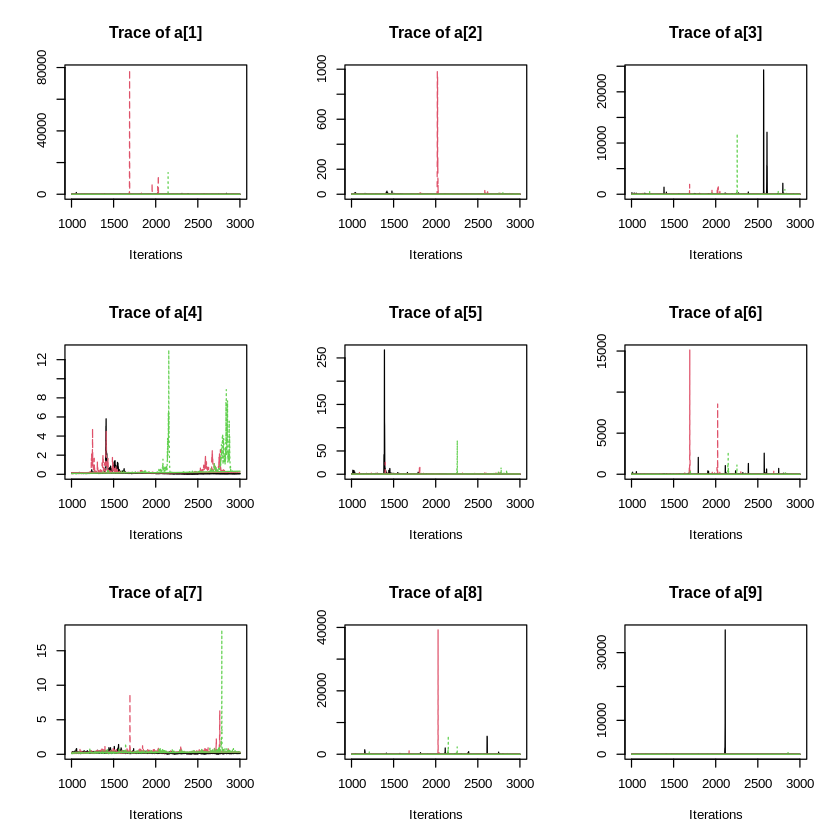

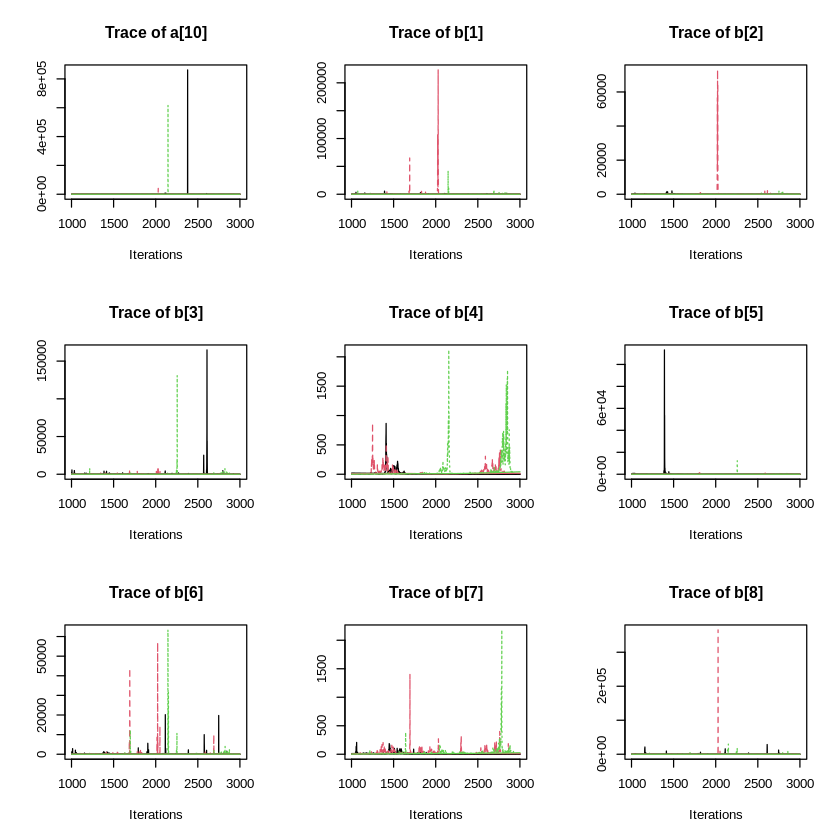

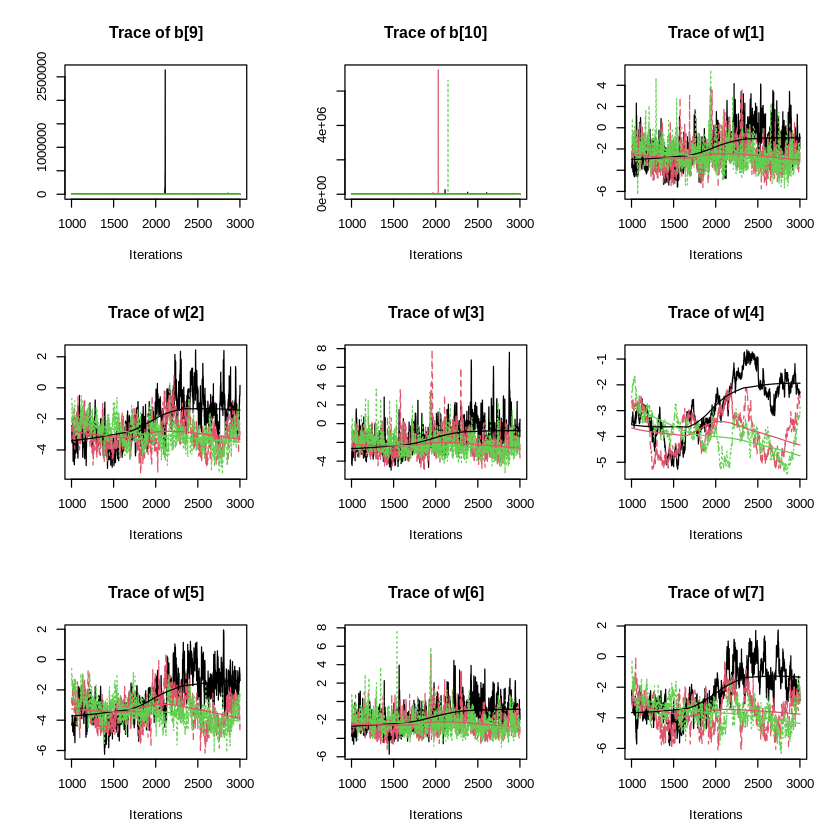

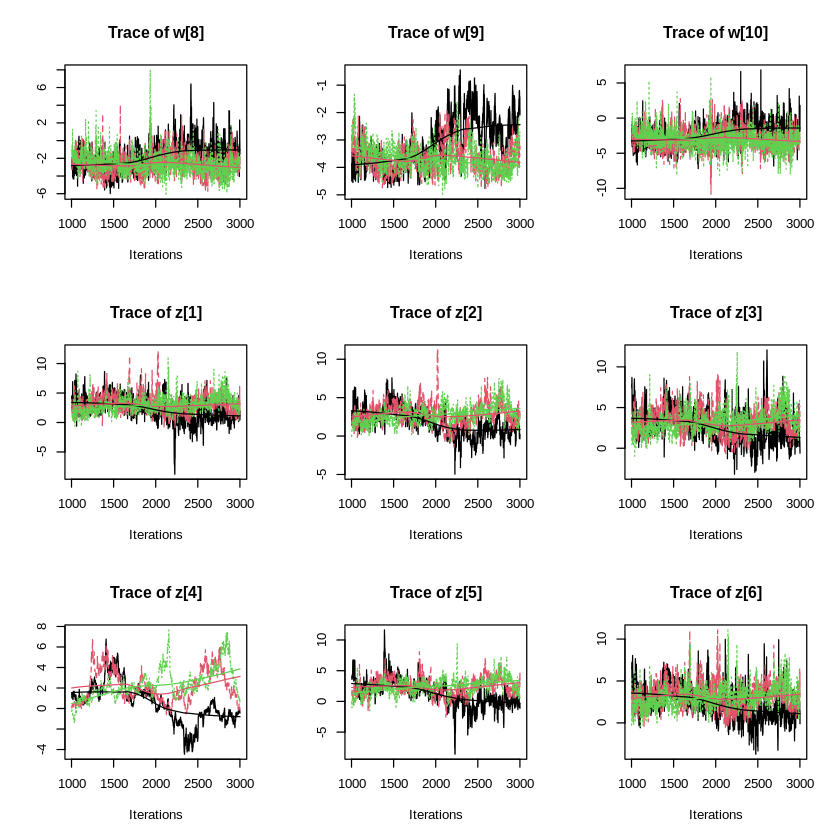

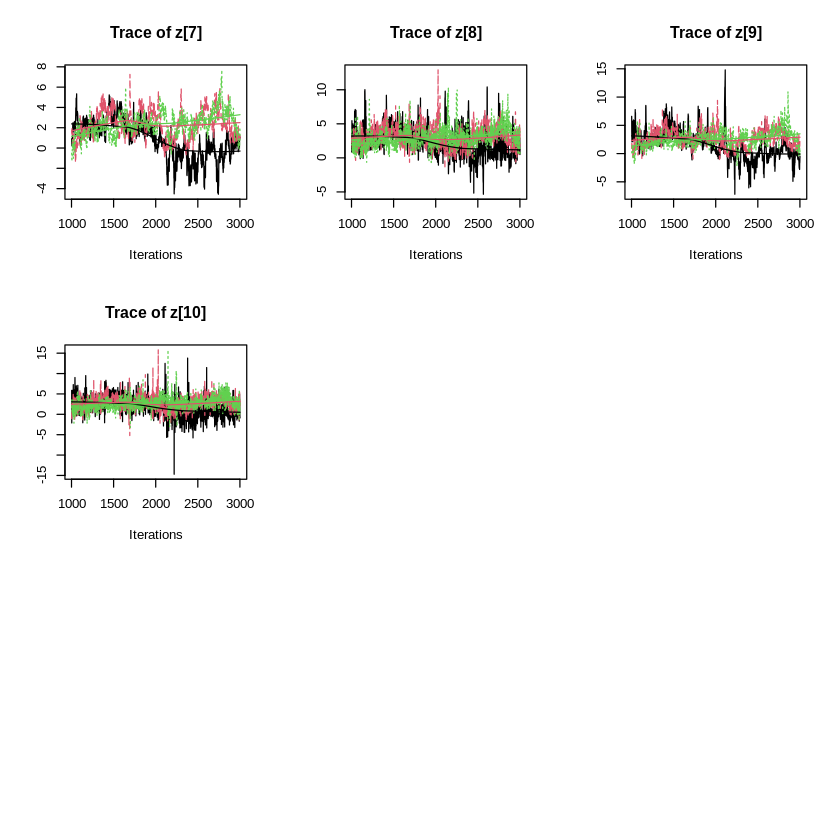

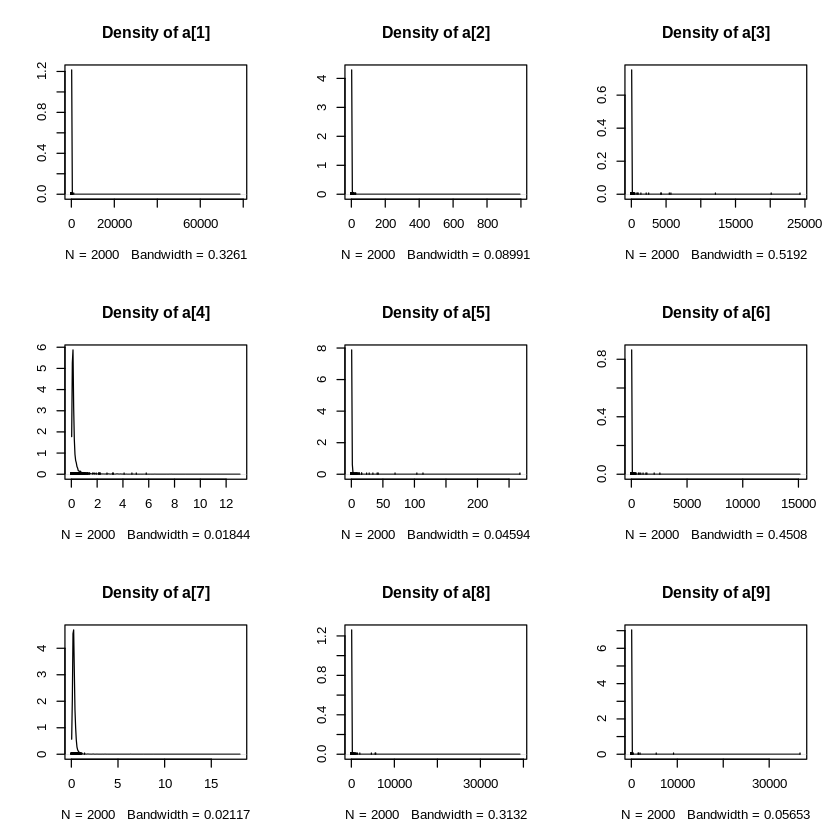

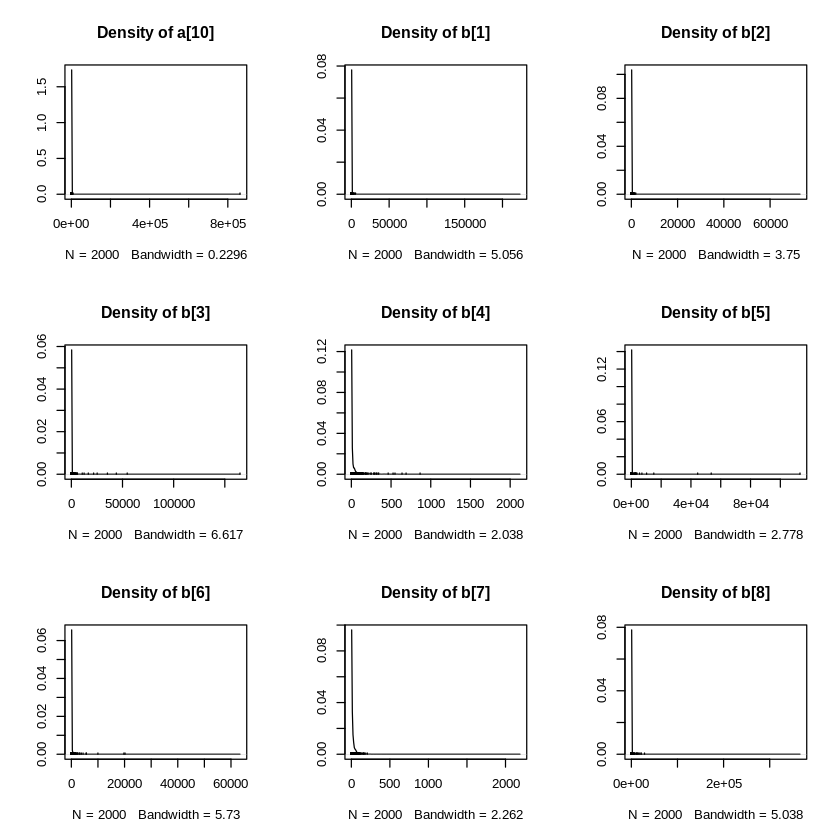

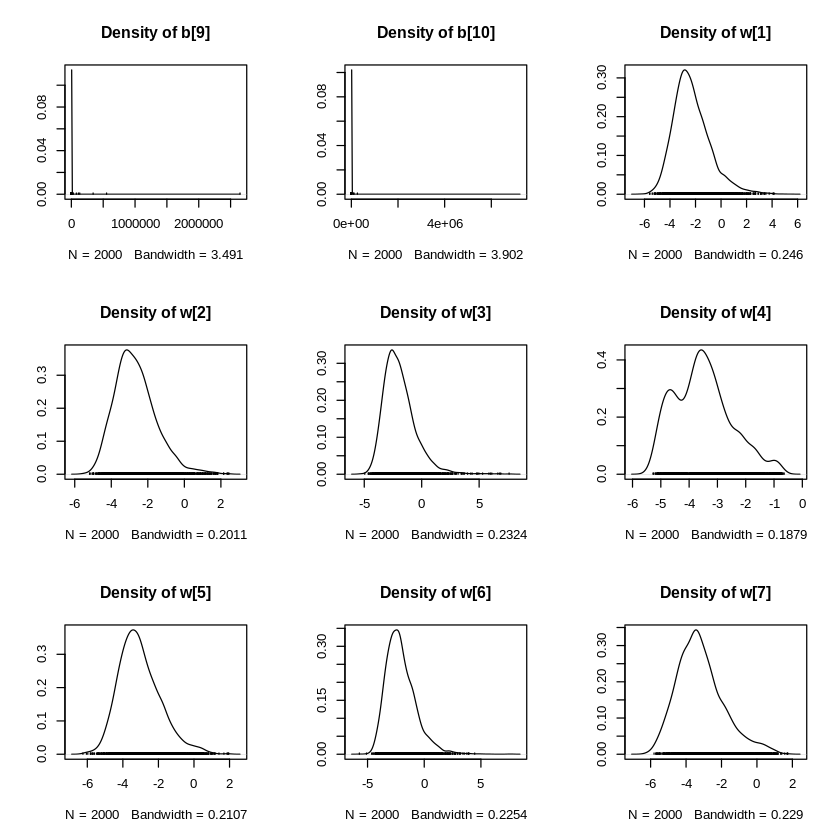

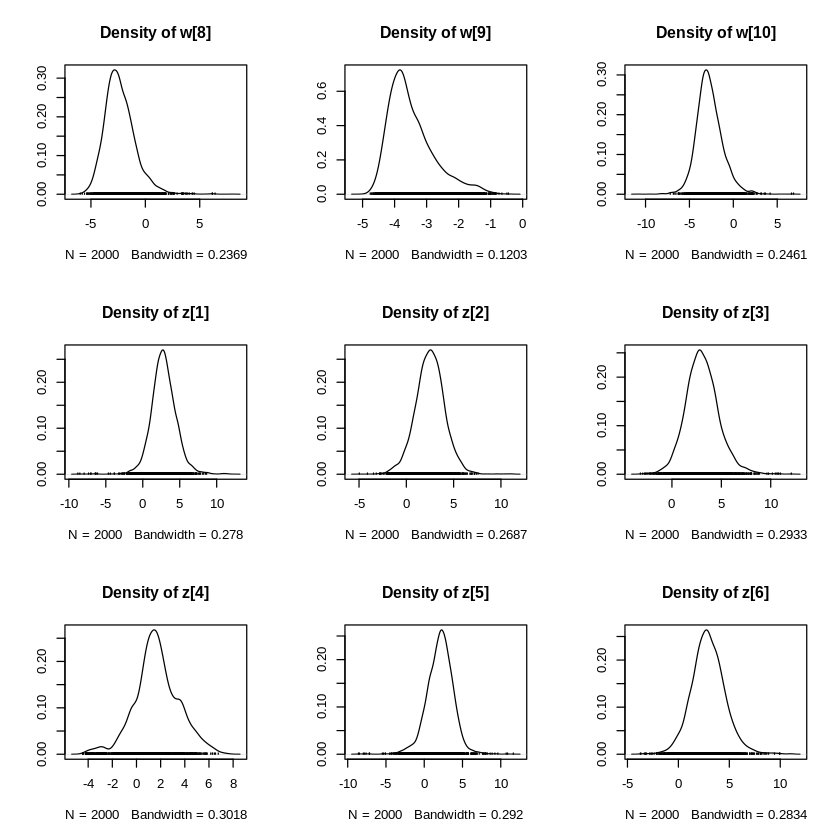

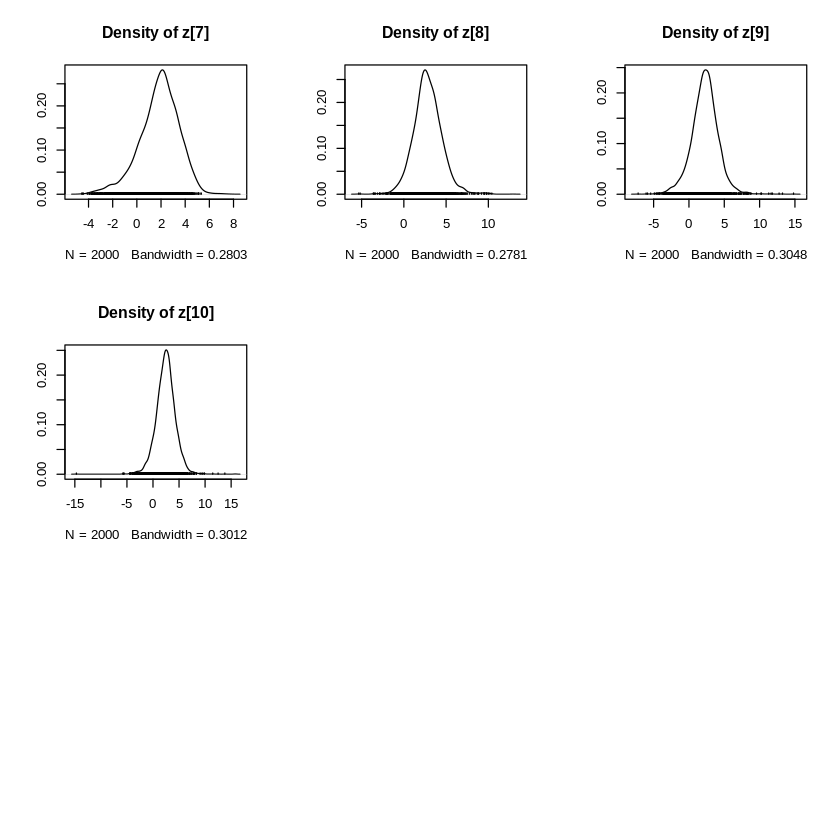

In [ ]:
#code and data: Peter Teunis+ A. Thebault + 1 fonction to plot results(Moez Sanaa) 
#reference https://hal.inrae.fr/hal-02796226v1
#former reference https://pubmed.ncbi.nlm.nih.gov/19081194/
#former reference https://www.cambridge.org/core/journals/epidemiology-and-infection/article/human-beings-are-highly-susceptible-to-low-doses-of-trichinella-spp/85A2F675954D369C6652AEFCAED34578


".RNG.state" <- c(19900, 14957, 25769)
#n.burn <- 1000000;
n.burn <- 2000;
#n.iter <- 600000;
n.iter <- 2000;
n.chains <- 3;
#n.thin <- 200;
n.thin=1
n.post <- n.iter/n.thin;

# tomonitor <- c("nm","nf");
tomonitor <- c("w","z","a","b");
# tomonitor <- c("a","b");

# 9 outbreaks

dosemu<-c(3521.100,74182.900,1506.40,578.700,377.000,1147.572,400.000,200.000,8522.400,4739.950,40.000,100.000,150.000,210.000)
#mu is the product of mu consumption and contamination
dosesize<-c(5.09,25.50,5.09,5.80,8.13,4.83,65.00,90.00,2.90,8.40,80.00,200.00,200.00,200.00)
n.dose<- c(2,1,1,1,1,2,1,1,4);
real.outb<-c(1,1,2,3,4,5,6,6,7,8,9,9,9,9)
#number of doses by outbreak
expos<-c(2,2,11,6,474,9,2,1,22,3,16,31,13,5)
#infec<-c(2,2,11,6,154,6,2,1,17,3,2,11,4,4)
sympt<-c(2,2,10,6,150,6,2,1,16,3,1,8,3,3)
n.ob<-9
sr<-0.7
prior.w <- rbind(c(-2.0,0.5),c(0.5,0.5));
prior.z <- rbind(c( 2.0,0.5),c(0.5,0.5));
# Add a single subject without observed data (for prediction)


n.dose <- c(n.dose,1);  
dosemu<-c(dosemu,10)
dosesize<-c(dosesize,100)
expos <- c(expos,1);     
sympt <- c(sympt,NA);
# give the relation between dose and outbreak
ob<-c(1,1,2,3,4,5,6,6,7,8,9,9,9,9,10)
drdata <- list("prior.w"=prior.w, "prior.z"=prior.z,
               "n.dose"=sum(n.dose),"sr"=sr,"ob"=ob,n.ob=10,
               "dosemu"=dosemu,"dosesize"=dosesize, "expos"=expos,"sympt"=sympt);


modelstring = "
model{
  # parent nodes: hyperparameters
  mu.w ~ dnorm(prior.w[1,1],prior.w[1,2])
  tau.w ~ dgamma(prior.w[2,1],prior.w[2,2])
  mu.z ~ dnorm(prior.z[1,1],prior.z[1,2])
  tau.z ~ dgamma(prior.z[2,1],prior.z[2,2])
  for(k.ob in 1:n.ob){
    # infection
    w[k.ob] ~ dnorm(mu.w,tau.w);
    z[k.ob] ~ dnorm(mu.z,tau.z);
    u[k.ob] <- exp(w[k.ob])/(1+exp(w[k.ob]));
    v[k.ob] <- exp(z[k.ob]);
    a[k.ob] <- u[k.ob]*v[k.ob];
    b[k.ob] <- (1-u[k.ob])*v[k.ob];
  }
  for(k.ds in 1:n.dose) {
    # infection
    nf[k.ds] ~ dnegbin(dosesize[k.ds]/(dosesize[k.ds]+dosemu[k.ds]*sr),
                       dosesize[k.ds]);
    nm[k.ds] ~ dnegbin(dosesize[k.ds]/(dosesize[k.ds]+dosemu[k.ds]*(1-sr)),
                       dosesize[k.ds]);
    lg0[k.ds] <- loggam(a[ob[k.ds]]+b[ob[k.ds]]) -
                 loggam(a[ob[k.ds]]+b[ob[k.ds]]+nf[k.ds]+nm[k.ds]) +
                 loggam(b[ob[k.ds]]+nf[k.ds]+nm[k.ds]) -
                 loggam(b[ob[k.ds]]);
    lgf[k.ds] <- loggam(a[ob[k.ds]]+b[ob[k.ds]]) -
                 loggam(a[ob[k.ds]]+b[ob[k.ds]]+nf[k.ds]) +
                 loggam(b[ob[k.ds]]+nf[k.ds]) -
                 loggam(b[ob[k.ds]]);
    lgm[k.ds] <- loggam(a[ob[k.ds]]+b[ob[k.ds]]) -
                 loggam(a[ob[k.ds]]+b[ob[k.ds]]+nm[k.ds]) +
                 loggam(b[ob[k.ds]]+nm[k.ds]) -
                 loggam(b[ob[k.ds]]);
    prinf[k.ds] <- (1+exp(lg0[k.ds])-exp(lgf[k.ds])-exp(lgm[k.ds]));
    sympt[k.ds] ~ dbin(prinf[k.ds],expos[k.ds]);
  }
} # end model
" # close quote for modelstring
writeLines(modelstring,con="model.txt")
#dd <- jags.model("model.txt",data=drdataprior,n.chains=n.chains);
#update(dd,n.burn=n.burn)
#mcmc.prior <- coda.samples(dd,tomonitor,n.iter=1000,thin=1);

mod.pst <- jags.model(file="model.txt",data=drdata,n.chains=n.chains);
update(mod.pst,n.burn=n.burn);
mcmc.pst <- coda.samples(mod.pst,tomonitor,n.iter=n.iter,thin=n.thin);

print(summary(mcmc.pst));

#print(gelman.diag(mcmc.pst));

#print(autocorr(mcmc.pst));

plot(mcmc.pst,trace=TRUE,density=FALSE);
plot(mcmc.pst,trace=FALSE,density=TRUE);


Plot results

[1] 37.17034

[1] -2.28837

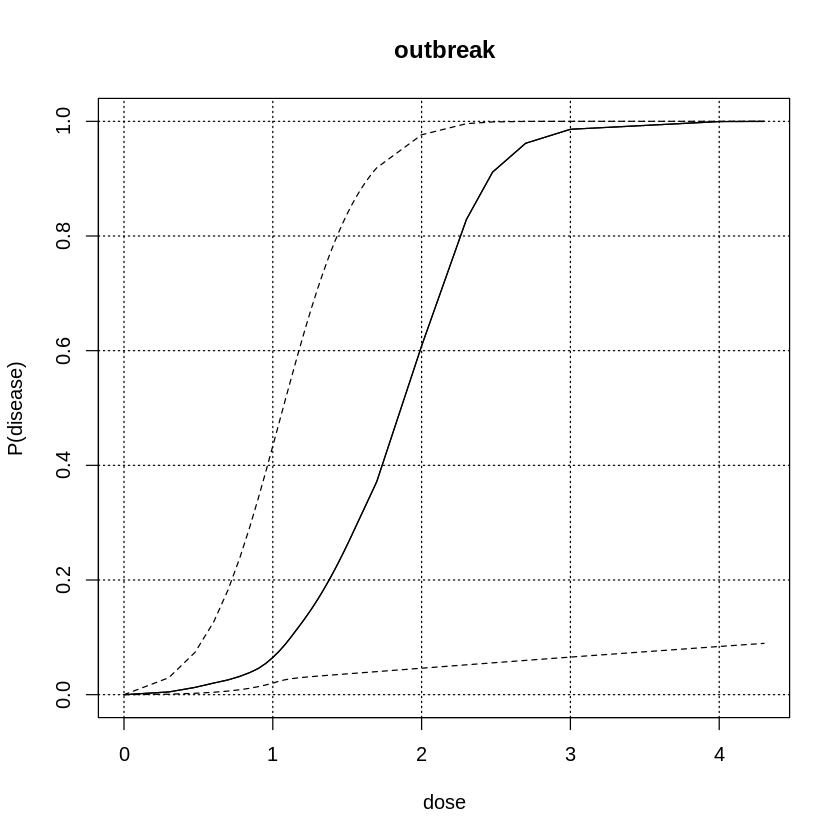

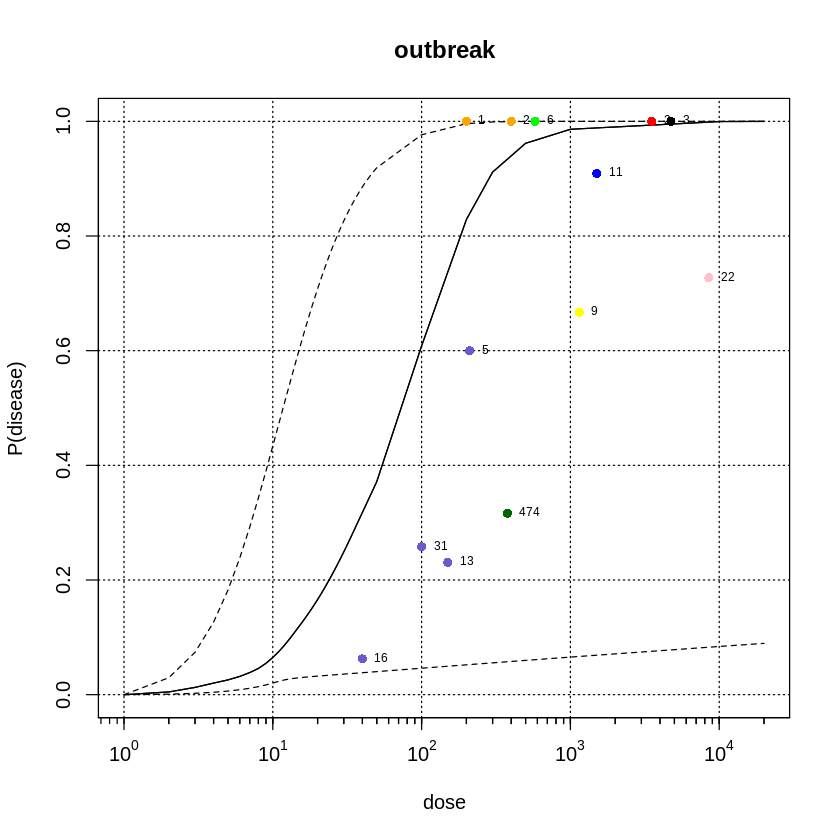

In [ ]:
#plot results
a.mc1   <- c(mcmc.pst[[1]][,"a[1]"],mcmc.pst[[2]][,"a[1]"],mcmc.pst[[3]][,"a[1]"])
mean(a.mc1)
ll<-length(a.mc1)/n.chains
#small function
extr.varp <- function(nam,index){
  var.mc <- c();
  varname <- paste(nam,"[",sep="");
  if(length(index)==1) varname <- paste(varname,index,"]",sep="");
  if(length(index)>1){
    for(k.index in 1:(length(index)-1)){
      varname <- paste(varname,index[k.index],",",sep="");
    }
    varname <- paste(varname,index[length(index)],"]",sep="");
  }
  for(k.chain in 1:n.chains){
    var.mc <- c(var.mc,as.vector(mcmc.pst[[k.chain]][,varname]));
  }
  return(var.mc);
}
wp.mc <- array(NA,dim=c(max(ob),n.chains*ll));
zp.mc <- array(NA,dim=c(max(ob),n.chains*ll));
for(k.ob in 1:max(ob)){
  wp.mc[k.ob,] <- extr.varp("w",c(k.ob));
  zp.mc[k.ob,] <- extr.varp("z",c(k.ob));
}
mean(wp.mc[1,])
a.mc <- array(NA,dim=c(max(ob),n.chains*n.post));
b.mc <- array(NA,dim=c(max(ob),n.chains*n.post));
for(k.ob in 1:max(ob)){
  a.mc[k.ob,] <- extr.varp("a",c(k.ob));
  b.mc[k.ob,] <- extr.varp("b",c(k.ob));
}

a<-a.mc[10,1:10]
b<-b.mc[10,1:10]

ticks.log <- function(ax,n.major,mintick,maxtick,...){
  lims <- par("usr") # get coordinates of graphics interface
  if(ax %in%c(1,3)) lims <- lims[1:2] else lims <- lims[3:4] # bottom,top,left,right?
  if(missing(n.major)) n.major <- round(lims[2]-lims[1])
  major.ticks <- pretty(lims,n.major) # choose pretty (major) breakpoints
  if(missing(mintick)) mintick <- min(major.ticks) # lowest tick point
  if(missing(maxtick)) maxtick <- max(major.ticks) # highest tick point
  major.ticks <- major.ticks[major.ticks >= mintick & major.ticks <= maxtick]
  if(n.major>1) {
    labels <- sapply(major.ticks,function(i)
              as.expression(bquote(10^ .(i))))
  } else {
  	labels <- FALSE
  }
  axis(ax,at=major.ticks,labels=labels,...) # show major ticks
  if(n.major<10) {
    n.minor <- 11 # include first and last...
    minpos <- c(outer(log10(pretty(c(1,10),n.minor)),seq(major.ticks[1],major.ticks[2]),`+`))-major.ticks[1]
    minpos <- minpos[-c(1,n.minor)] # remove unwanted elements
    minor.ticks = c(outer(minpos,major.ticks,`+`)) # calculate positions
    minor.ticks <- minor.ticks[minor.ticks > mintick & minor.ticks < maxtick]
    if(n.major>1) {
      labels <- FALSE
    } else {
      labels <- sapply(minor.ticks,function(i)
                as.expression(bquote(.(10^i))))
    }
    axis(ax,at=minor.ticks,tcl=par("tcl")*0.5,labels=labels,...) # show minor ticks
  }
}





DRbinom<-function(x){
  doset=x
  dosef=0:x
  dosefprob=dbinom(x=dosef,size=x,prob=sr)
  
   Dr<-function(dosef){
     dosem=doset-dosef
     gammat<-lgamma(a+b)+lgamma(doset+b)-lgamma(a+b+doset)-lgamma(b)
     gammaf<-lgamma(a+b)+lgamma(dosef+b)-lgamma(a+b+dosef)-lgamma(b)
     gammam<-lgamma(a+b)+lgamma(dosem+b)-lgamma(a+b+dosem)-lgamma(b)
     pinf<-1+exp(gammat)-exp(gammaf)-exp(gammam)
     return(quantile(pinf,c(0.025,0.5,0.975),na.rm=TRUE))
   }
  res<-t(sapply(dosef,function(x) Dr(x)))
  res<-apply(res*dosefprob,2,sum)
  return(res)
}
doset=c(0,1,2:50,50,100,200,300,500,1000,10000,20000) 
res<-t(sapply(doset,function(x) DRbinom(x))) 
par(mfrow=c(1,1))

plot(log10(doset),res[,2],
       ylim=c(0,1),xlim=c(0,log10(20000)),
       main="outbreak",
       ylab="P(disease)",
       xlab="dose",
       type="l");
  colo <- c("2.5%","50%","97.5%");
   lines(log10(doset),res[,2],lty=1);
  lines(log10(doset),res[,1],lty=2);
  lines(log10(doset),res[,3],lty=2);
  grid(col=1,lty = "dotted")


plot(log10(doset),res[,2],
       ylim=c(0,1),xlim=c(0,log10(20000)),
       main="outbreak",
       ylab="P(disease)",
       xlab="dose",xaxt="n",
       type="l");
  colo <- c("2.5%","50%","97.5%");
   lines(log10(doset),res[,2],lty=1);
  lines(log10(doset),res[,1],lty=2);
  lines(log10(doset),res[,3],lty=2);
  ticks.log(1,n.major=6);
  grid(col=1,lty = "dotted")
data<-as.data.frame(cbind(real.outb,dosemu[-length(dosemu)],expos[-length(dosemu)],sympt[-length(dosemu)]))
colnames(data)<-c("ob","meandose","expos","sympt")
for (i in 1:n.ob){

    outb<-data[data$ob==i,]
    doses <- 10^seq(-1,6,0.25);
    color<-c("red","blue","green","darkgreen","yellow","orange","pink","black","slateblue")
  points(log10(outb$meandose),outb$sympt/outb$expos, col=color[i],pch=16,cex=1)
text(log10(outb$meandose), outb$sympt/outb$expos, outb$expos, cex=0.6, pos=4, col="black") 
}

  


